In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection,linear_model
%matplotlib inline

In [2]:
housing=pd.read_csv("house price.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#let's get some info about the data like its data-types, any missing value or not
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
#we can cross check it by following function also
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
#since 'CHAS' is our categorical data, so we will see its counts
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
#now we want to see some statistical info
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Observations:

1.We can see that the 'CHAS' column has it's mean deviated towards 0 and also all the percentiles 25%,50%,75% all are 0 since the count of 0 is way larger than 1 as we calculated in the previous step.

2.Also the columns 'TAX' and 'B' have very high standard deviations , this is because the mean value of the 'TAX' column is around 408 but as we seen the values of the 'TAX' column in heads of the data, most of them are around 200, which causes such a great standard deviation, same is the case with column 'B'.

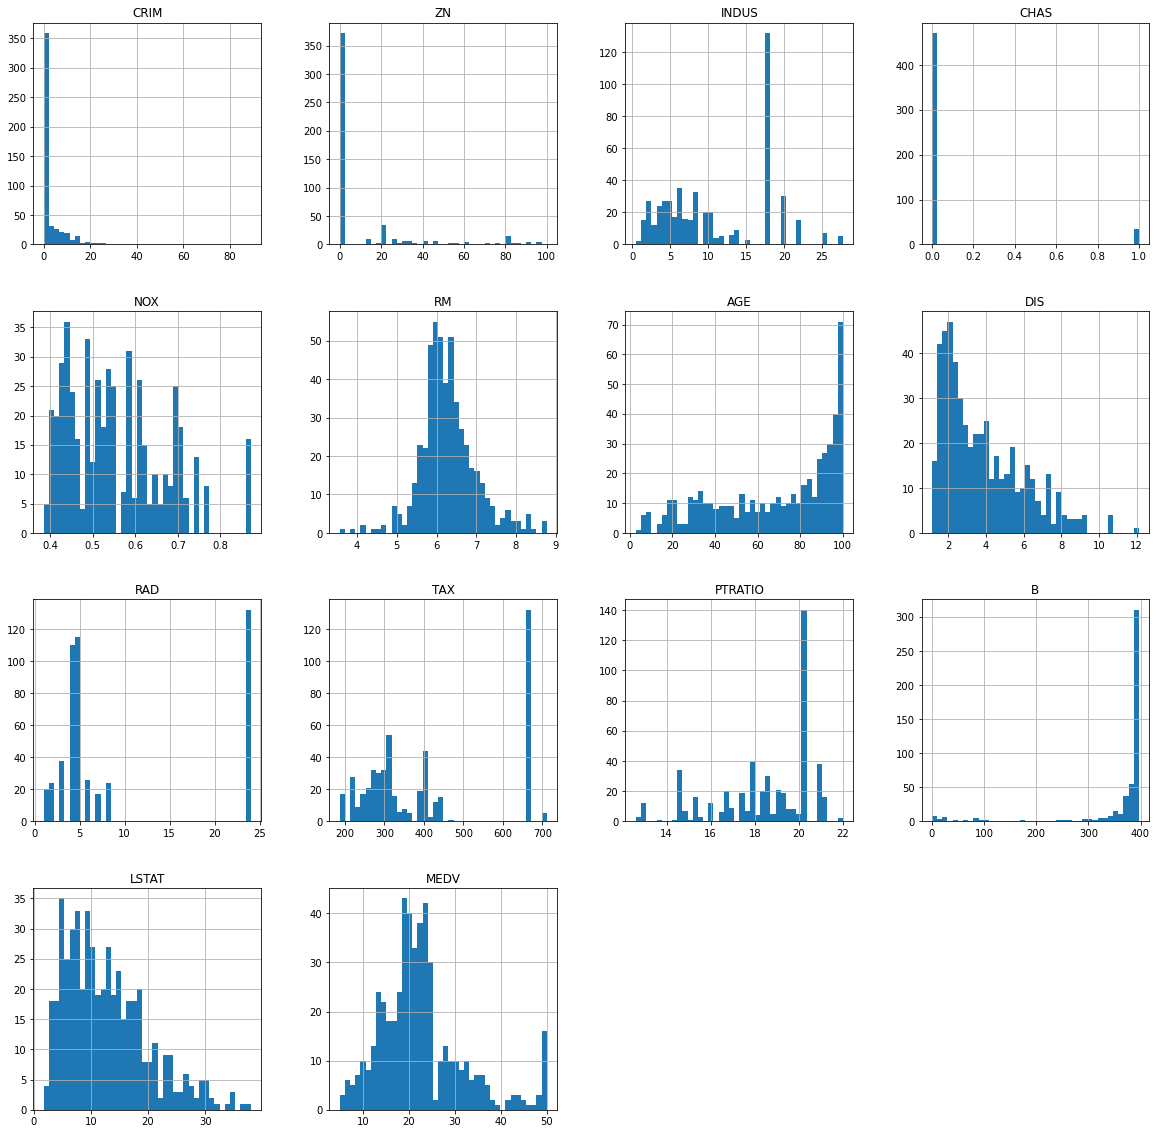

In [7]:
housing.hist(bins=40,figsize=(20,20))
plt.show()

Observations

1.Looking at the CRIM plot and ZN plot we can say that most of the houses have zero crime rate and have zero proportion land zoned to lots of over 25,000 sq. ft.

2.Whereas looking at the NOX plot we conclude that most of the houses in the data have nitrogen oxide concenteration of 
around 0.4 to 0.5

3.Now if we look at the RM plot, we can say thet most of the houses are having between 6 to 7 rooms per dwelling and by AGE plot it is clear that most of them are around 100 years old.

4.While looking at the RAD and TAX plots we observe strange exceptional values that are called outliers which can cause great trouble if not handeled. So we'll try to deal with them in further steps.

5.And in our target column we can see that most of our houses price lies between 15 to 25 thousand dollars.

<AxesSubplot:>

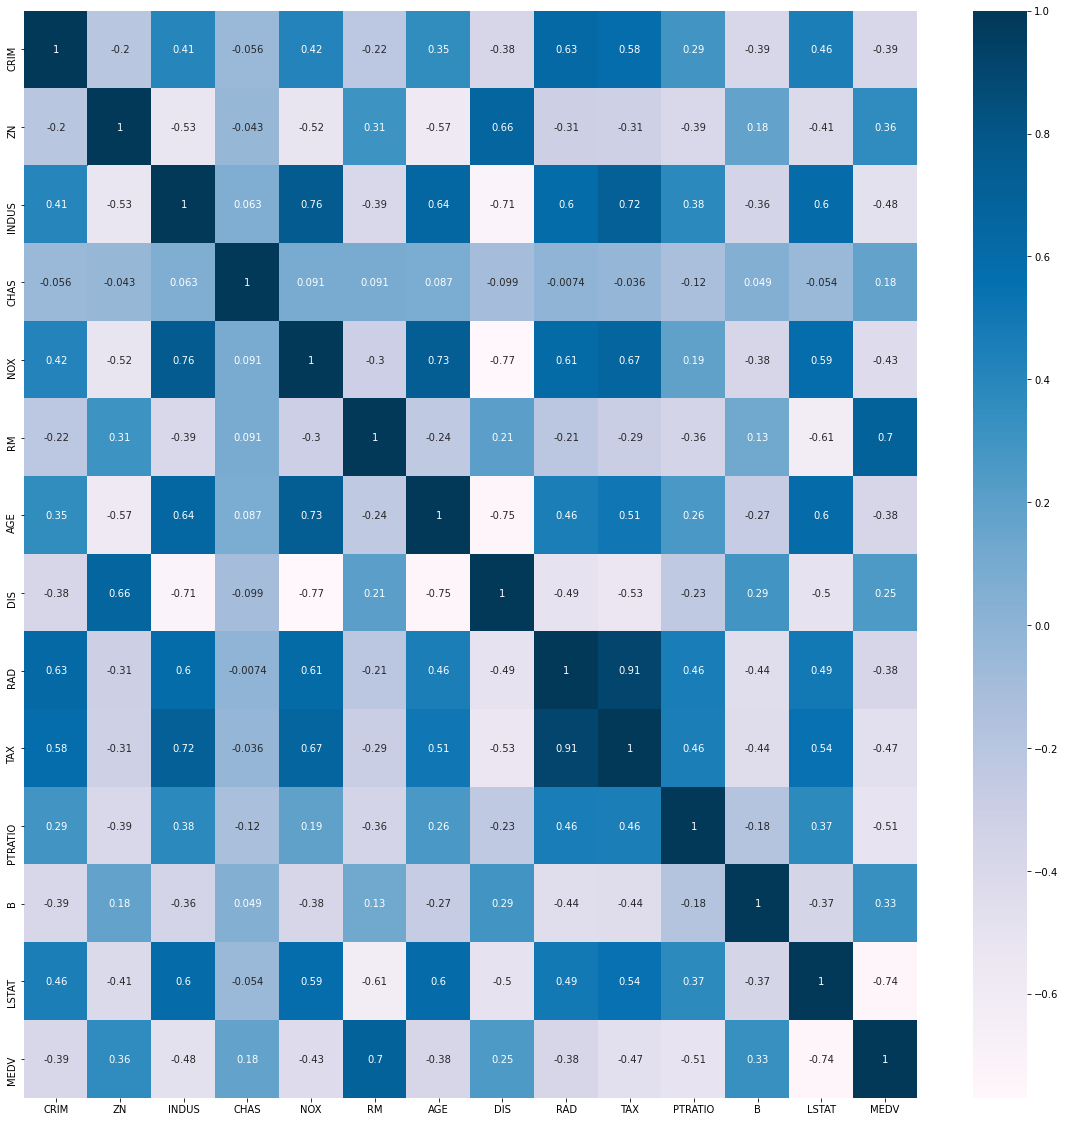

In [8]:
#Now we'll see the correlation between the columns
corr=housing.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='PuBu',annot=True)

Observations:

1.We can clearly see that column TAX and RAD are highly correlated whereas column DIS , NOX and AGE seem to be negatively correlated

In [9]:
#In this step we'll split the data into train and test sections
X=housing.drop('MEDV',1)
y=housing['MEDV']
print(X.head(),"\n\n")
print(y.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33   


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [10]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=40)
data=[X_train,X_test,y_train,y_test]
for values in data:
    print("\n",values.head())


          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
213   0.14052   0.0  10.59     0  0.489  6.375   32.3  3.9454    4  277   
388  14.33370   0.0  18.10     0  0.700  4.880  100.0  1.5895   24  666   
284   0.00906  90.0   2.97     0  0.400  7.088   20.8  7.3073    1  285   
334   0.03738   0.0   5.19     0  0.515  6.310   38.5  6.4584    5  224   
175   0.06664   0.0   4.05     0  0.510  6.546   33.1  3.1323    5  296   

     PTRATIO       B  LSTAT  
213     18.6  385.81   9.38  
388     20.2  372.92  30.62  
284     15.3  394.72   7.85  
334     20.2  389.40   6.75  
175     16.6  390.96   5.33  

          CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
358   5.20177   0.0  18.10     1  0.770  6.127  83.4  2.7227   24  666   
197   0.04666  80.0   1.52     0  0.404  7.107  36.6  7.3090    2  329   
48    0.25387   0.0   6.91     0  0.448  5.399  95.3  5.8700    3  233   
450   6.71772   0.0  18.10     0  0.713  6.749  92.6  2.3236   24  66

In [11]:
print(X_train['CHAS'].value_counts())
print("\n\n",X_test['CHAS'].value_counts())

0    378
1     26
Name: CHAS, dtype: int64


 0    93
1     9
Name: CHAS, dtype: int64


We can see that the proportion in which our categorical column CHAS is split in train and test is almost same ,if it wouldn't have been same it could have caused underfitting and in order to avoid that situation we would have used stratified split.

In [12]:
housing.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [13]:
housing['TAX/RM']=housing['TAX']/housing['RM']
housing['TAX/RM'].corr(housing['MEDV'])

-0.5376496863047937

We can see that the new column which we just created is giving a good range of negative correlation which can be considered an important feature while fitting the model

Text(0, 0.5, 'MEDV')

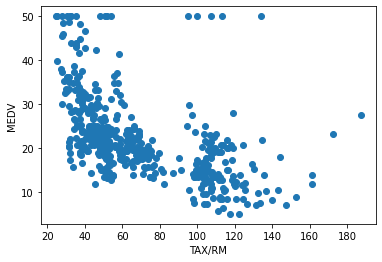

In [14]:
#Let's see this new column graphically
plt.scatter(housing['TAX/RM'],housing['MEDV'])
plt.xlabel('TAX/RM')
plt.ylabel('MEDV')

We can see it in the plot also the negative slop suggests the negative correlation between the columns

# Model Selection 

In [15]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [17]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('RIDGE',Ridge()))
models.append(('LASSO',Lasso()))
models.append(('BR',BayesianRidge()))
models.append(('SVR',SVR()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('RFR',RandomForestRegressor()))

results=[]
names=[]
for name,model in models:
    cv_results=model_selection.cross_val_score(model,X_train,y_train)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR:0.722933 (0.055593)
RIDGE:0.720580 (0.057044)
LASSO:0.656361 (0.051318)
BR:0.711760 (0.054598)
SVR:0.224429 (0.125082)
DTR:0.706710 (0.042597)
RFR:0.848958 (0.057846)


Observations:

We can observe that the best model with the best score is Random Forest Regressor (RFR)

### Model Fitting 

In [18]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

### Model Testing 

In [23]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_test)
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE :  4.020451682994599


So we are getting a not so bad error in our model

### Loading the Model 

In [24]:
from joblib import dump, load
dump(model, 'Housing.joblib')

['Housing.joblib']